# News headlines

In this notebook I analyse a news headlines to find major news stories. The data is from the kaggle dataset:

    A Million News Headlines
    by Rohit Kulkarni
    https://www.kaggle.com/therohk/million-headlines
    
I create word clouds to show the biggest stories of each year.


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import wordninja #https://github.com/keredson/wordninja
from tqdm import tqdm
import re
import numpy as np
import os
import re


df = pd.read_csv('abcnews-date-text.csv')

In [83]:
df['publish_date'] = pd.DatetimeIndex(df['publish_date'].astype("string"))
df

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers
...,...,...
1226253,2020-12-31,what abc readers learned from 2020 looking bac...
1226254,2020-12-31,what are the south african and uk variants of ...
1226255,2020-12-31,what victorias coronavirus restrictions mean f...
1226256,2020-12-31,whats life like as an american doctor during c...


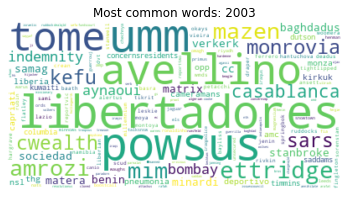

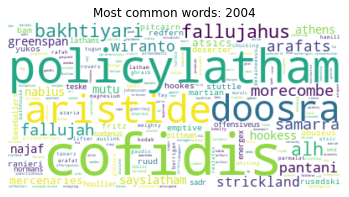

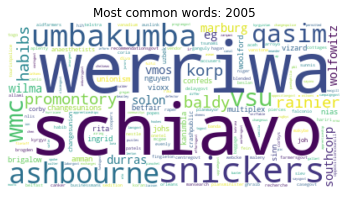

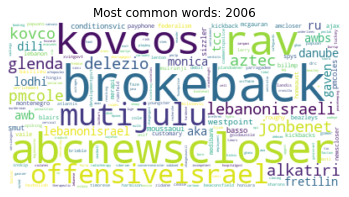

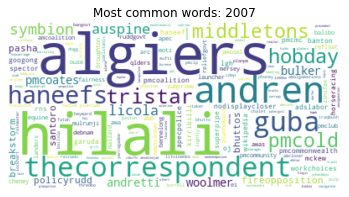

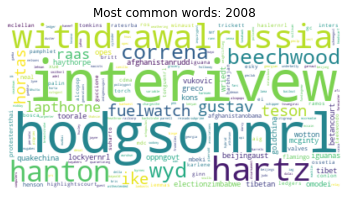

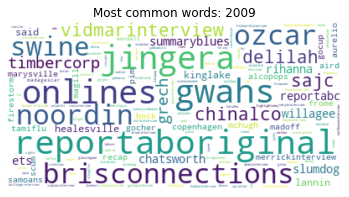

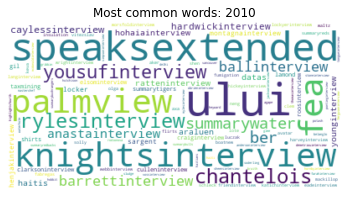

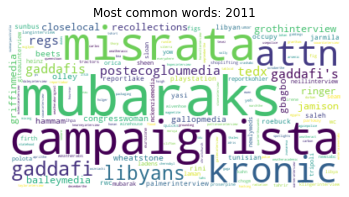

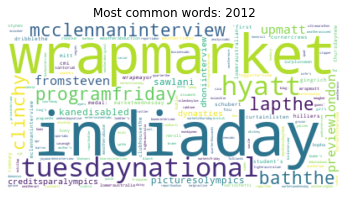

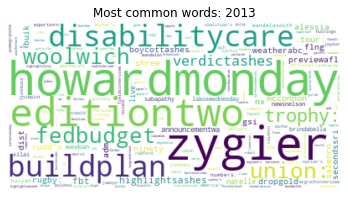

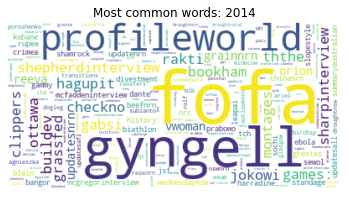

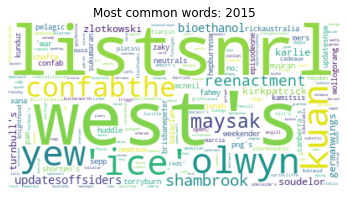

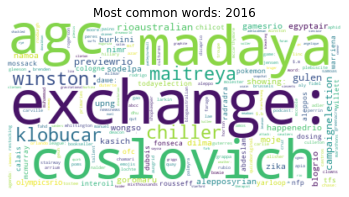

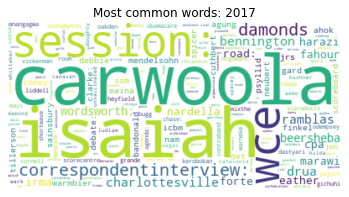

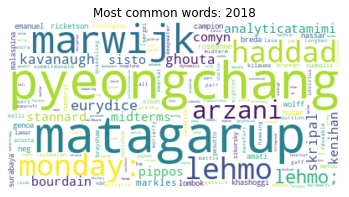

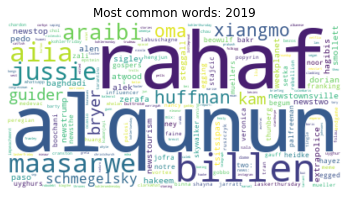

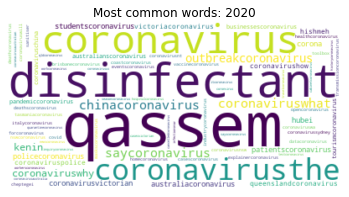

In [103]:
#Preprocess a string of text to remove unwanted symbols
def preprocess(text):
    output = re.sub(r'\d+', '', text)
    return output
    
#Get a dictionary containing counts for each word if text
def tf(text, subsplit = False):

    counts = {}
    for word in text.split(' '):
        if subsplit:
            #Many spaces seem to be missing in the data so we use wordninja to recover the seperate words 
            #eg. coronavirusthe -> coronavirus, the
            for word_part in wordninja.split(word):
                counts[word_part] = counts.get(word_part,0) + 1           
        else:
            counts[word] = counts.get(word,0) + 1           
    return counts

#Given two word count dictionaries one for a subset of all the text and one for the whole text extract tfidf counts
#Scale allows us to get integer frequencies by multiplying the tfidf value by scale and rounding
#min count allows us to remove very infrequent words which have disproportionately hgh tfidf values.

def tfidf(counts,counts_total,scale = 1,min_count = 5):
    tfidf_dict = {}
    for k in counts:
        if (counts[k] > min_count) and (k not in STOPWORDS):
            if scale >1:
                tfidf_dict[k] = (scale*counts[k])//counts_total[k]
            else:
                tfidf_dict[k] = counts[k]/counts_total[k]
    return tfidf_dict
#Make word cloud. See:https://amueller.github.io/word_cloud/auto_examples/frequency.html?highlight=frequencies
def makeImage(text):
    wc = WordCloud(background_color="white", max_words=1000)
    
    # generate word cloud
    wc.generate_from_frequencies(text)
    
    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

#Class which saves count for all words and generates tfidf vectors by year

all_count = tf(preprocess(''.join(list(df['headline_text']))))

#get tfidf by year        
def get_features(year):
    textyear = preprocess(''.join(list(df[df['publish_date'].dt.year == year]['headline_text'])))
    tfidf_dict = tfidf(tf(textyear),all_count,1000)
    return tfidf_dict

for year in range(2003,2021): 
    plt.title(f'Most common words: {year}')
    makeImage(get_features(year))


Further Work

Goal: find clusters corresponding to events


Possible clustering approaches

- day/month/year -> tfidf : maybe for visualisation
- word-article matrix
    - cluster articles
    - cluster words

Workflow: data -> vectors -> clusters

Vectors:
    - article-word matrix
    - article -> embedding
